

### Q-matrix design in Kalman filter

Q-matrix is the matrix that represents the white noise in the processing (predict) steps. The impact of Q:

- If Q is too small, the filter will be overconfident and will give less weight to the measurement.
- If Q is too large, the filter will more easily believe the noise from estimation.

In this design, a 3rd Newton kinematic model has Q in discretization:


$$
Q = \int_{0}^{dt} F(t)Q_cF^T(dt)dt
$$

$$
F = \begin{bmatrix} 1 & dt & \frac{dt^2}{2} \\ 0 & 1 & dt \\ 0 & 0 & 1 \end{bmatrix}
$$

The Q_c is the continuous white noise covariance matrix. The Q_c is a 3x3 matrix, and the diagonal elements are the variance of the white noise in the position, velocity, and acceleration. The off-diagonal elements are zero. The Q_c is a constant matrix.

$$
Q_c = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix} \sigma_{spectral}
$$

Solved we get:

$$
Q = \begin{bmatrix} \frac{dt^5}{20} & \frac{dt^4}{8} & \frac{dt^3}{6} \\ \frac{dt^4}{8} & \frac{dt^3}{3} & \frac{dt^2}{2} \\ \frac{dt^3}{6} & \frac{dt^2}{2} & dt \end{bmatrix} \sigma_{spectral}
$$


Please refer to the mentioned pages for more details.

Refer to "Kalman and Bayesian Filters in Python" page 246 and "Estimation with Applications to Tracking and Navigation" page 270.
$$
Refer to Kalman and Bayesian fliters in Python page 246 and Estimation with applicaitons to tracking and navigation page 272

### Replay Analysis

In [76]:
import requests
import pandas as pd
import json
import numpy as np

url = 'http://localhost:8000/replay/13/?start_date=2024-02-06%2010%3A00%3A00&end_date=2024-02-06%2010%3A20%3A00'  # Replace this with your actual endpoint URL
response = requests.get(url)

if response.status_code == 200:
    print("Request was successful.")
    data = response.json()  # Convert response to JSON format
    df = pd.read_json(data, orient='records')
else:
    print("Request failed. Status code:", response.status_code)

df['se_h'] = np.sqrt(df['cov_east_h'] + df['cov_east_h'])
df['se_t'] = np.sqrt(df['cov_east_t'] + df['cov_east_t'])

Request was successful.


C:\Users\ZOZN109\AppData\Local\Temp\ipykernel_83072\2631634343.py:12: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(data, orient='records')


In [77]:
df['cov_east_h']

0        14.567257
1        15.962687
2         7.543089
3       577.008187
4        24.981895
          ...     
164      24.971404
165    1091.557758
166      99.530550
167      21.543981
168      35.894148
Name: cov_east_h, Length: 169, dtype: float64

In [78]:
df[df['sensor_type'] == 'Beacon']

,timestamp,sensor_type,sensor_id,dt,latitude_h,longitude_h,latitude_t,longitude_t,east_h,north_h,...,cov_north_h,cov_east_t,cov_north_t,cov_speed,cov_heading_h,cov_heading_t,raw_longitude,raw_latitude,se_h,se_t
22,2024-02-06 10:02:43+00:00,Beacon,8068,1.0,50.010248,2.876271,50.012397,2.876330,3.811233e+06,3.013421e+06,...,94.362661,134.833575,606.420481,0.367540,11.357113,15.929953,2.876281,50.010176,14.041222,16.421545
47,2024-02-06 10:05:51+00:00,Beacon,8116,9.0,50.145947,2.871826,50.147591,2.870956,3.812364e+06,3.028485e+06,...,99.691155,8582.074786,47743.656426,8.378652,53.577838,61.965492,2.871829,50.145945,14.127101,131.012021
58,2024-02-06 10:07:01+00:00,Beacon,2586,4.0,50.189754,2.869903,50.200128,2.865809,3.812695e+06,3.033352e+06,...,98.895315,598.035712,11976.481248,1.933939,28.074025,39.889785,2.869923,50.189655,14.038424,34.584266
89,2024-02-06 10:10:43+00:00,Beacon,2587,1.0,50.306911,2.890692,50.310637,2.892805,3.815420e+06,3.046188e+06,...,83.596364,90.686170,465.615566,0.374819,14.094779,22.732095,2.890420,50.306304,13.565302,13.467455
100,2024-02-06 10:12:01+00:00,Beacon,8117,4.0,50.345324,2.936589,50.346280,2.937779,3.819080e+06,3.050128e+06,...,97.864349,4437.371772,3337.643361,1.922530,28.121447,39.900225,2.936593,50.345313,13.999673,94.205857
129,2024-02-06 10:15:28+00:00,Beacon,8118,1.0,50.469963,2.975774,50.475034,2.977971,3.823169e+06,3.063671e+06,...,86.671454,83.652320,653.737120,0.362342,14.060397,22.716668,2.975561,50.469305,13.737551,12.934629
149,2024-02-06 10:17:57+00:00,Beacon,8119,5.0,50.542698,3.066816,50.546335,3.067620,3.830357e+06,3.071117e+06,...,96.194573,43950.666656,23969.315876,2.697265,28.725439,40.876581,3.066561,50.542654,13.140426,296.481590
157,2024-02-06 10:18:51+00:00,Beacon,2590,8.0,50.555657,3.115169,50.557812,3.120339,3.833902e+06,3.072230e+06,...,99.641068,24823.155981,12244.786481,6.716279,48.138229,56.260458,3.115154,50.555648,14.112774,222.814524
166,2024-02-06 10:19:51+00:00,Beacon,2588,8.0,50.571312,3.165584,50.573408,3.178642,3.837618e+06,3.073631e+06,...,99.698139,30831.580560,6255.126711,6.695274,48.099309,56.256029,3.165535,50.571302,14.108901,248.320682


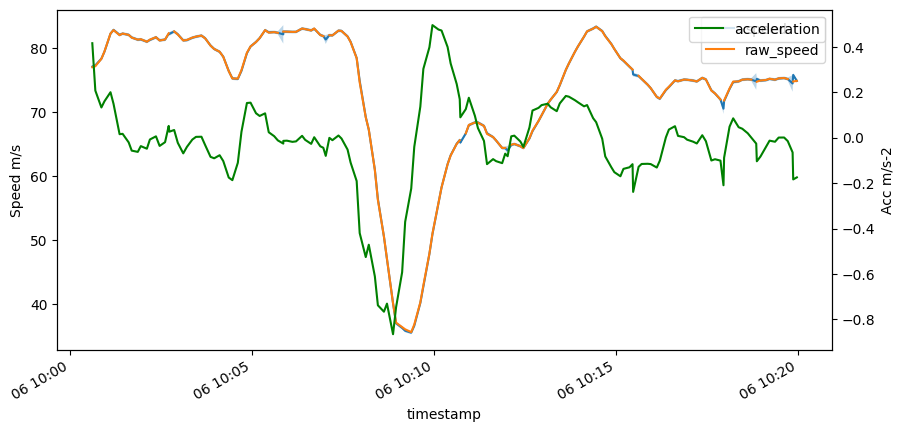

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

n = 4  # start
m = 169 # end

fig, ax1 = plt.subplots(figsize=(10, 5))  # Create a figure and axes for the primary plot
ax2 = ax1.twinx()  # Create a secondary y-axis
df['speed_sde'] = np.sqrt(df['cov_speed'])

df.iloc[n:m].plot(x='timestamp', y=['speed', 'raw_speed'], kind='line', ax=ax1)  # Plot speed and raw_speed on the primary y-axis

# Plot the fill in between speed and cov_speed
ax1.fill_between(df['timestamp'].iloc[n:m], df['speed'].iloc[n:m] - 0.5 * df['speed_sde'].iloc[n:m], df['speed'].iloc[n:m] + 0.5 * df['speed_sde'].iloc[n:m], alpha=0.3)

df.iloc[n:m].plot(x='timestamp', y=['acceleration'], kind='line', ax=ax2, color='green')  # Plot speed and raw_speed on the primary y-axis

ax1.set_ylabel('Speed m/s')  # Set label for the primary y-axis
ax2.set_ylabel('Acc m/s-2')  # Set label for the secondary y-axis

plt.show()  # Display the plot


In [98]:
df[df['sensor_id']==45332]


0      45332
1      45337
2      45332
3      45337
4      45332
       ...  
164    45332
165    45337
166     2588
167    45332
168    45337
Name: sensor_id, Length: 169, dtype: int64

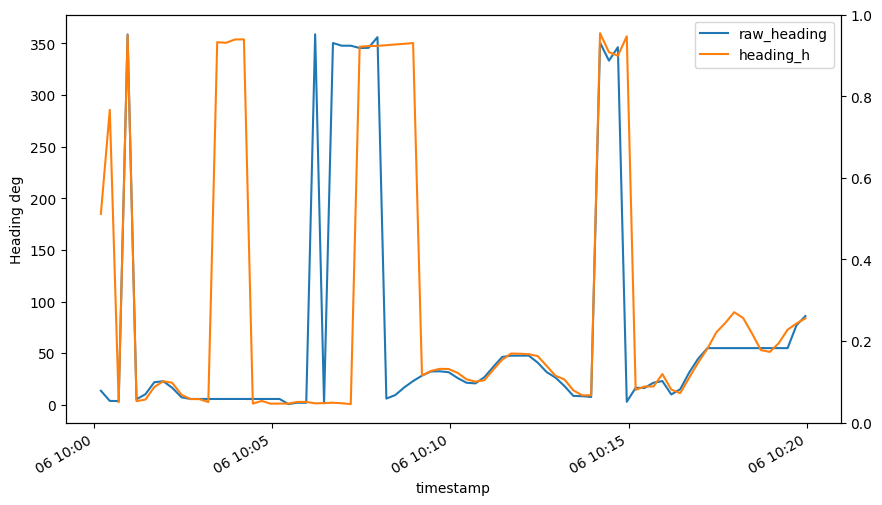

In [111]:
fig, ax1 = plt.subplots(figsize=(10, 6))  # Create a figure and axes for the primary plot
ax2 = ax1.twinx()  # Create a secondary y-axis

df[df['sensor_id']==45337].plot(x='timestamp', y=['raw_heading','heading_h'], kind='line', ax=ax1)  # Plot speed and raw_speed on the primary y-axis
#df[df['sensor_id']==45332].plot(x='timestamp', y=['raw_heading','heading_t'], kind='line', ax=ax1)  # Plot speed and raw_speed on the primary y-axis

#df.iloc[n:].plot(x='timestamp', y=['orientation'], kind='line', ax=ax2)  # Plot speed and raw_speed on the primary y-axis

ax1.set_ylabel('Heading deg')  # Set label for the primary y-axis
#ax2.set_ylabel('orientation deg')  # Set label for the secondary y-axis

plt.show()  # Display the plot

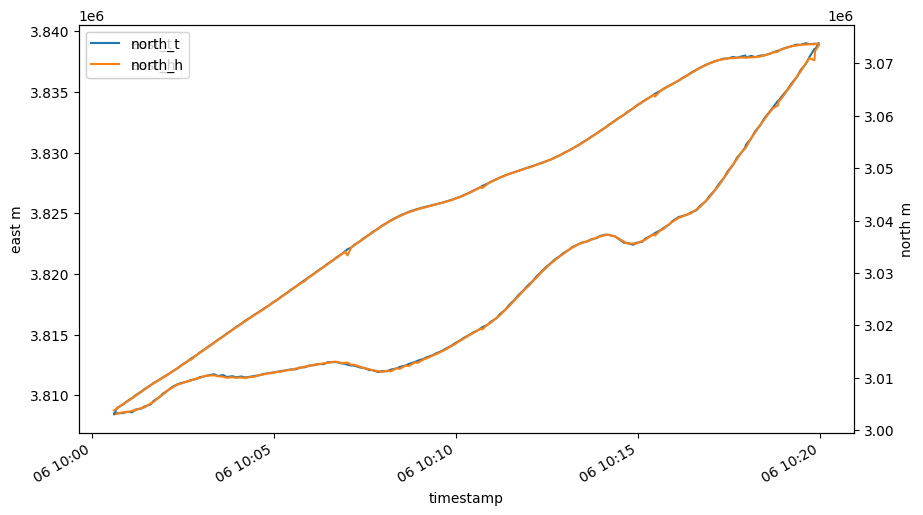

In [91]:
fig, ax1 = plt.subplots(figsize=(10, 6))  # Create a figure and axes for the primary plot
ax2 = ax1.twinx()  # Create a secondary y-axis

df.iloc[n:m].plot(x='timestamp', y=['east_t','east_h'], kind='line', ax=ax1)  # Plot speed and raw_speed on the primary y-axis
df.iloc[n:m].plot(x='timestamp', y=['north_t','north_h'], kind='line', ax=ax2)  # Plot speed and raw_speed on the primary y-axis

ax1.set_ylabel('east m')  # Set label for the primary y-axis
ax2.set_ylabel('north m')  # Set label for the secondary y-axis

plt.show()  # Display the plot

In [83]:
import folium
import numpy as np
import utm
import math
import branca

# Create a map centered at the mean latitude and longitude values
m = folium.Map(location=[df['latitude_h'].iloc[-1], df['longitude_h'].iloc[-1]], zoom_start=13)

# Define a color mapping function or dictionary
color_mapping = {
    45332: 'red',
    45337: 'blue',
    # Add more sensor_id-color mappings as needed
}

# Iterate over the dataframe rows and add markers and circles to the map
for i in range(len(df)):
    sensor_id = df['sensor_id'].iloc[i]
    color = color_mapping.get(sensor_id, 'gray')  # Default to gray if sensor_id is not found in the mapping
    
    # Plot raw records
    folium.Marker([df['raw_latitude'].iloc[i], df['raw_longitude'].iloc[i]], popup=sensor_id, icon=folium.Icon(color=color)).add_to(m)
    
    # In order to compare with raw records, we need to select the right sensors
    if sensor_id == 45332:
        folium.Circle([df['latitude_h'].iloc[i], df['longitude_h'].iloc[i]], radius=df['se_h'].iloc[i], color=color, popup=df['timestamp'].iloc[i], fill=True, fill_color=color).add_to(m)
    elif sensor_id == 45337:
        folium.Circle([df['latitude_t'].iloc[i], df['longitude_t'].iloc[i]], radius=df['se_t'].iloc[i], color=color, popup=df['timestamp'].iloc[i], fill=True, fill_color=color).add_to(m)    
    else:
        folium.Circle([df['latitude_h'].iloc[i], df['longitude_h'].iloc[i]], radius=df['se_h'].iloc[i], color=color, popup=df['timestamp'].iloc[i], fill=True, fill_color=color).add_to(m)

m

In [319]:
df.lag

0       63.246909
1       74.835705
2       96.604832
3       73.202667
4      101.330454
          ...    
164    120.972161
165    130.000000
166    112.719848
167    115.951516
168    129.594790
Name: lag, Length: 169, dtype: float64

In [85]:
import folium
import numpy as np
import utm
import math
import branca

# Create a map centered at the mean latitude and longitude values
m = folium.Map(location=[df['latitude_h'].iloc[-1], df['longitude_h'].iloc[-1]], zoom_start=13)

# Define a color mapping function or dictionary
color_mapping = {
    45332: 'red',
    45337: 'blue',
    # Add more sensor_id-color mappings as needed
}

# Iterate over the dataframe rows and add markers and circles to the map
for i in range(len(df)):
    sensor_id = df['sensor_id'].iloc[i]
    color = color_mapping.get(sensor_id, 'gray')  # Default to gray if sensor_id is not found in the mapping
    
    # Plot raw records
    folium.Marker([df['raw_latitude'].iloc[i], df['raw_longitude'].iloc[i]], popup=sensor_id, icon=folium.Icon(color=color)).add_to(m)
    
    # In order to compare with raw records, we need to select the right sensors
    line_coordinates = [[df['latitude_t'].iloc[i], df['longitude_t'].iloc[i]], [df['latitude_h'].iloc[i], df['longitude_h'].iloc[i]]]
    folium.PolyLine(line_coordinates, color='black', weight=2.5).add_to(m)
    
    folium.Circle([df['latitude_h'].iloc[i], df['longitude_h'].iloc[i]], radius=df['se_h'].iloc[i], color=color, popup=df['timestamp'].iloc[i], fill=True, fill_color=color).add_to(m)
    folium.Circle([df['latitude_t'].iloc[i], df['longitude_t'].iloc[i]], radius=df['se_t'].iloc[i], color=color, popup=df['timestamp'].iloc[i], fill=True, fill_color=color).add_to(m)

m